In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

new_columns = ['Color', 'Origin', 'Item Size',
               'Variety', 'City Name', 'Package']

new_pumpkins = pumpkins.drop(
    [c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)


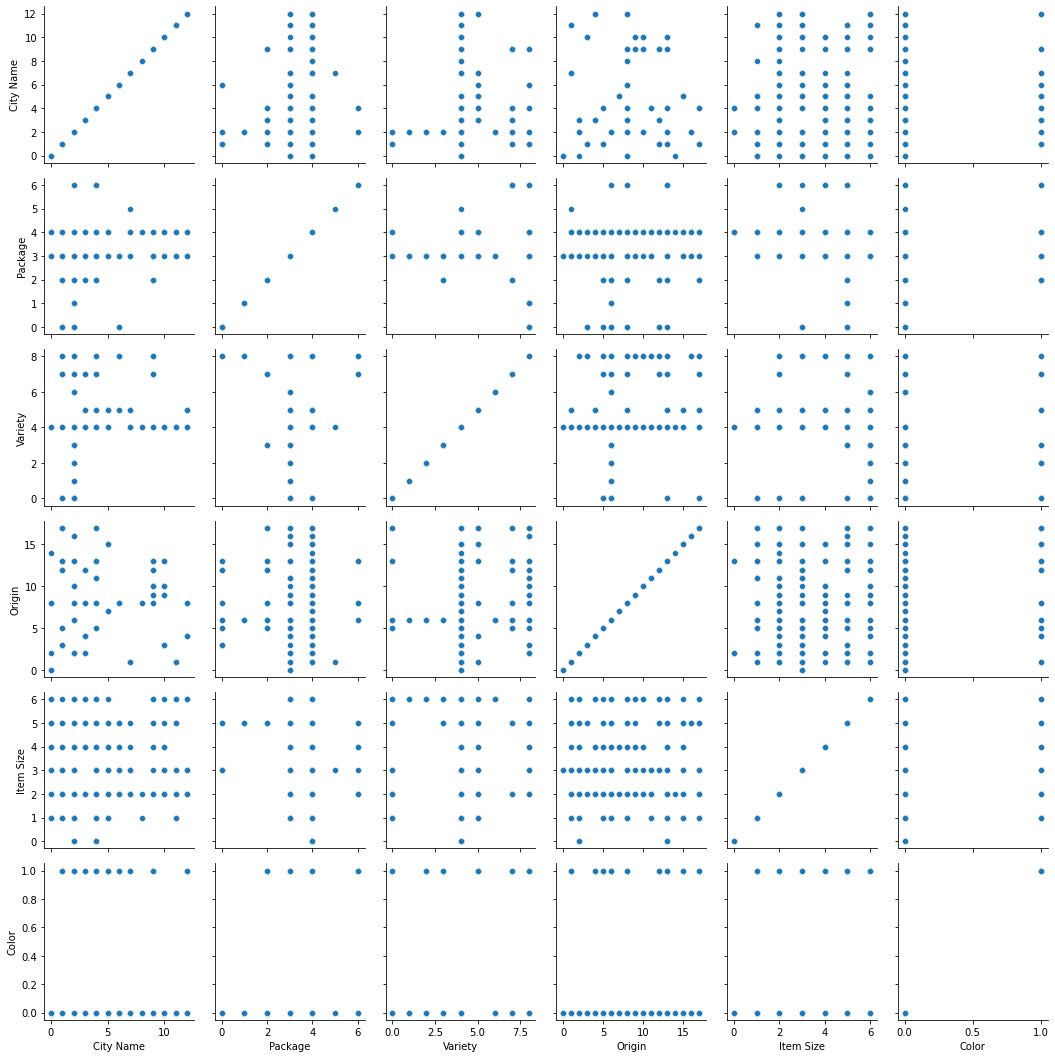

In [4]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)

g.map(sns.scatterplot)

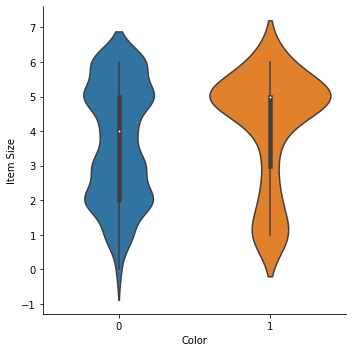

In [6]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)


In [7]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

/Users/chuisi/.pyenv/versions/3.8.2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chuisi/.pyenv/versions/3.8.2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

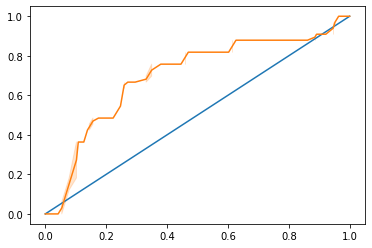

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

In [11]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748
